In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import time
import numpy as np
import matplotlib.pyplot as plt

In [15]:
fashion_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

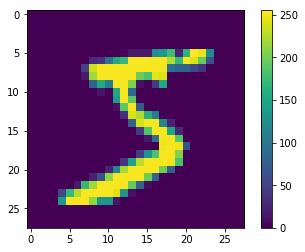

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

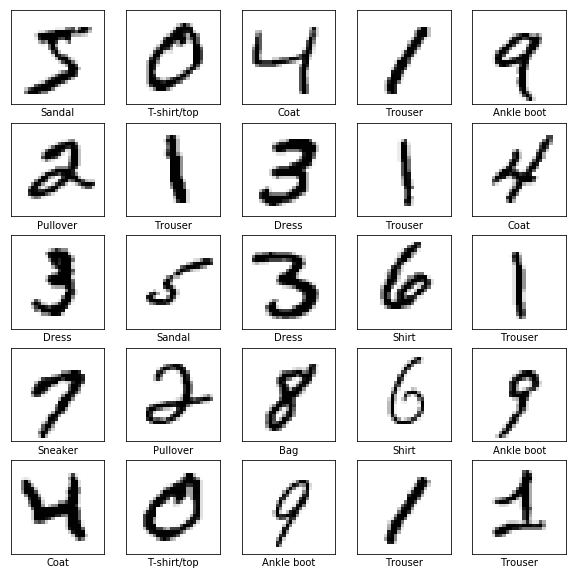

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(20, 5, input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50, 5),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
start = time.time()
model.fit(train_images.reshape([-1,28, 28,1]), train_labels, epochs=12)
print(time.time() - start)

Epoch 1/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.1227 - acc: 0.9630
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0465 - acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0332 - acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0283 - acc: 0.9912
Epoch 5/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0232 - acc: 0.9928
Epoch 6/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0192 - acc: 0.9939
Epoch 7/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.0189 - acc: 0.9943
Epoch 8/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.0183 - acc: 0.9947
Epoch 9/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0191 - acc: 0.9947
Epoch 10/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0163 - a

In [23]:
test_loss, test_acc = model.evaluate(test_images.reshape([-1,28, 28,1]), test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 82us/step
('Test accuracy:', 0.9845)


In [24]:
predictions = model.predict(test_images.reshape([-1,28, 28,1]))

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

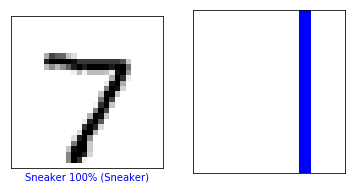

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)